# Experimento 6 : Test te results

## Load the CBNs and show his topologies

Número total de archivos pickle encontrados: 7
Archivos pickle encontrados:
outputs/exp6_data_3_9_1000/pkl_cbn/cbn_6_3.pkl
outputs/exp6_data_3_9_1000/pkl_cbn/cbn_6_4.pkl
outputs/exp6_data_3_9_1000/pkl_cbn/cbn_6_5.pkl
outputs/exp6_data_3_9_1000/pkl_cbn/cbn_6_6.pkl
outputs/exp6_data_3_9_1000/pkl_cbn/cbn_6_7.pkl
outputs/exp6_data_3_9_1000/pkl_cbn/cbn_6_8.pkl
outputs/exp6_data_3_9_1000/pkl_cbn/cbn_6_9.pkl


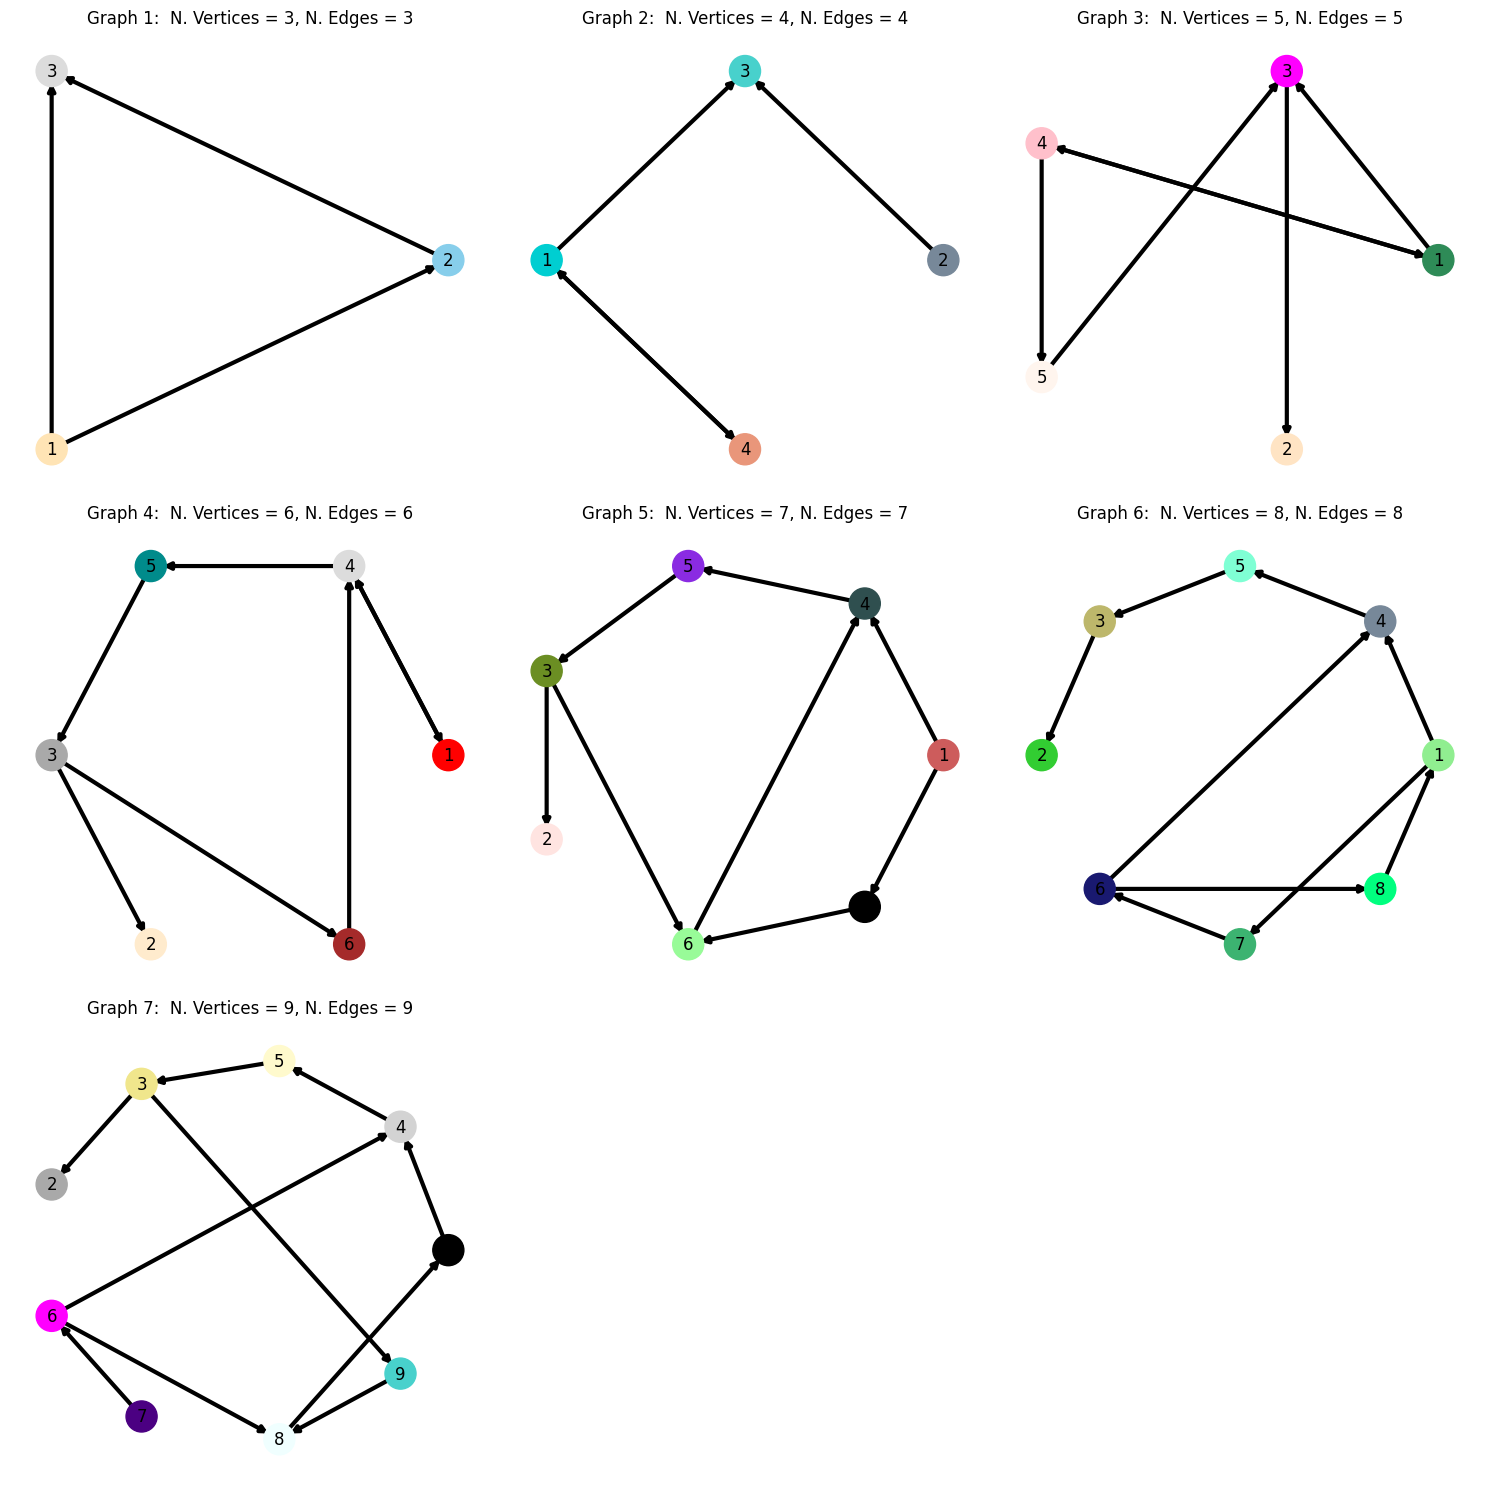

In [35]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

# Define el segundo número en la ruta del archivo pickle
first_number = 6
second_number = 3  # Cambia esto según sea necesario

# Ruta base sin el número cambiante
base_path_cbn = f'outputs/exp6_data_3_9_1000/pkl_cbn/cbn_{first_number}_'

# Número inicial y rango máximo
start_number = second_number
max_number = 3 * start_number

# Lista de archivos pickle existentes
pickle_files = [f"{base_path_cbn}{i}.pkl" for i in range(start_number, max_number + 1) if os.path.exists(f"{base_path_cbn}{i}.pkl")]

# Número total de gráficos
total_graphs = len(pickle_files)
print(f"Número total de archivos pickle encontrados: {total_graphs}")

# Imprimir los nombres de los archivos pickle encontrados
print("Archivos pickle encontrados:")
for file in pickle_files:
    print(file)

# Configuración de subplots en múltiples filas y columnas
cols = 3
rows = max(1, (total_graphs + cols - 1) // cols)  # Ensure rows is at least 1

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Aplanar la matriz de ejes si hay más de una fila
if rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]  # Convert the single axis to a list for consistency

# Iterador para cargar y mostrar las topologías
for i, (path_cbn, ax) in enumerate(zip(pickle_files, axes)):
    with open(path_cbn, 'rb') as file:
        o_cbn = pickle.load(file)
    
    # Mostrar la información de CBN en el subplot correspondiente
    o_cbn.plot_topology(ax=ax)  # Asegúrate de que plot_topology acepte un parámetro ax
    
    # Asignar un título a cada subgráfico
    ax.set_title(f"Graph {i + 1}:  N. Vertices = {i+3}, N. Edges = {i+3}")

# Eliminar ejes vacíos si hay menos gráficos que espacios de subplots
if total_graphs < rows * cols:
    # Flatten the axes array (if it's an array) into a list
    axes = np.ravel(axes)
    
    # Iterate through and delete any unused axes
    for ax in axes[total_graphs:]:
        fig.delaxes(ax)

# Ajustar el layout y mostrar todas las gráficas juntas
plt.tight_layout()
plt.show()


In [36]:
# Iterador para cargar y mostrar las topologías
for path_cbn, ax in zip(pickle_files, axes):
    with open(path_cbn, 'rb') as file:
        o_cbn = pickle.load(file)
        # o_cbn.show_description()
        print(o_cbn.o_global_topology.get_edges())

[(2, 3), (1, 2), (1, 3)]
[(2, 3), (1, 3), (1, 4), (4, 1)]
[(1, 3), (1, 4), (4, 1), (4, 5), (5, 3), (3, 2)]
[(1, 4), (4, 1), (4, 5), (5, 3), (3, 2), (3, 6), (6, 4)]
[(1, 4), (4, 5), (5, 3), (3, 2), (3, 6), (6, 4), (1, 7), (7, 6)]
[(1, 4), (4, 5), (5, 3), (3, 2), (6, 4), (1, 7), (7, 6), (6, 8), (8, 1)]
[(1, 4), (4, 5), (5, 3), (3, 2), (6, 4), (7, 6), (6, 8), (8, 1), (3, 9), (9, 8)]


In [37]:
import contextlib
import io

# Crear la carpeta de descripción si no existe
description_folder = 'description'
os.makedirs(description_folder, exist_ok=True)

# Función para extraer el índice del archivo pickle
def extract_index(file_path):
    file_name = os.path.splitext(os.path.basename(file_path))[0]
    return file_name.split('_')[-1]

# Iterador para cargar y guardar las descripciones
for path_cbn in pickle_files:
    idx = extract_index(path_cbn)
    
    with open(path_cbn, 'rb') as file:
        o_cbn = pickle.load(file)
    
    # Capturar la salida de o_cbn.show_description()
    description = io.StringIO()
    with contextlib.redirect_stdout(description):
        o_cbn.show_description()
    
    # Guardar la descripción en un archivo de texto
    description_file_path = os.path.join(description_folder, f'description_{idx}.txt')
    with open(description_file_path, 'w') as desc_file:
        desc_file.write(description.getvalue())

print("Descripciones guardadas en la carpeta 'description'.")

Descripciones guardadas en la carpeta 'description'.
